In [1]:
'''
Approximate length distribution from 3 species that has low, mid and high intron density
'''
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from scipy import stats

#Get length distribution from low intron density species

#### Step 1, initial exon distribution

In [2]:
sourceLow = '/home/richard/largeDataSet/ES_Run_modfileAug2015/Schpo1.ES_C_4.mod'
targetLow = '/home/richard/research/tests/Oct29AssembleModel/partsForModel/length_distributions/low/'

In [3]:
with open(sourceLow) as f:
    text = f.read()
    initial_distr = text.split('$INITIAL_DISTR')[1].split('$EXON_DISTR')[0].rstrip().lstrip().split('\n')
    initial_distr = map(lambda x: x.split(), initial_distr)
    initial_distr = map(lambda x: (int(x[0]), float(x[1])), initial_distr)

In [4]:
## get length distibution
table = pd.DataFrame(initial_distr, columns=['position','probability'])
table.sort_index(axis = 0, ascending = False, by = ['probability'], inplace = True)

probabilityAccumulation = 0.82
table['accProb'] = table.probability.cumsum()
idx  = table.accProb < probabilityAccumulation

table_sub = table[idx].copy()
table_sub.sort_index(axis = 0, by = ['position'], inplace = True)

In [5]:
## generate sample length for gamma to fit
size = 100000
counts = map(lambda n: int(round(n)),table_sub.probability*size)
table_sub['counts'] = counts

lengths = sc.parallelize(table_sub[['position','counts']].values).flatMap(lambda (a,b):[a]*b).collect()

In [6]:
## fit gamma distribution
shape,loc,scale = stats.gamma.fit(lengths)
print "shape = {}, scale = {}".format(shape,scale)

shape = 1.3668948396, scale = 96.4777189748


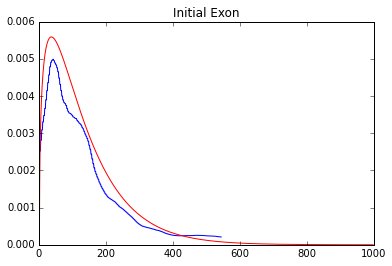

In [7]:
n = 1000
plt.plot(table_sub.position[:n],table_sub.probability[:n], label = 'ES')
plt.plot(range(n),stats.gamma.pdf(range(n),shape,loc,scale), 'r',label = 'Gamma Fitting')
plt.title('Initial Exon')
plt.show()

In [8]:
## visually checked, write to file
initial_distr_approx = pd.DataFrame({'position':range(3,10001), 'probability':stats.gamma.pdf(range(3,10001),shape,loc,scale)})
initial_distr_approx.probability = initial_distr_approx.probability.apply(lambda x: "%.10f"%x)

outputFile = '{}initial_exon_low.txt'.format(targetLow)
initial_distr_approx.to_csv(outputFile, index = None, header = None, sep = '\t')

#### Step 2, internal exon distribution

In [9]:
with open(sourceLow) as f:
    text = f.read()
    internal_distr = text.split('$EXON_DISTR')[1].split('$TERMINAL_DISTR')[0].rstrip().lstrip().split('\n')
    internal_distr = map(lambda x: x.split(), internal_distr)
    internal_distr = map(lambda x: (int(x[0]), float(x[1])), internal_distr)

shape = 2.01353981207, scale = 86.1761089258


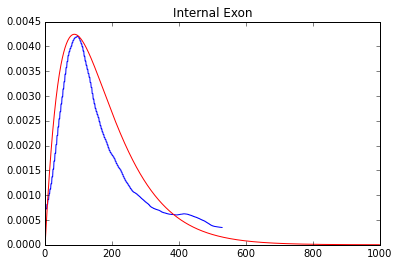

In [10]:
## get length distibution
table = pd.DataFrame(internal_distr, columns=['position','probability'])
table.sort_index(axis = 0, ascending = False, by = ['probability'], inplace = True)

probabilityAccumulation = 0.82
table['accProb'] = table.probability.cumsum()
idx  = table.accProb < probabilityAccumulation

table_sub = table[idx].copy()
table_sub.sort_index(axis = 0, by = ['position'], inplace = True)

## generate sample length for gamma to fit
size = 100000
counts = map(lambda n: int(round(n)),table_sub.probability*size)
table_sub['counts'] = counts

lengths = sc.parallelize(table_sub[['position','counts']].values).flatMap(lambda (a,b):[a]*b).collect()

## fit gamma distribution
shape,loc,scale = stats.gamma.fit(lengths)
print "shape = {}, scale = {}".format(shape,scale)

n = 1000
plt.plot(table_sub.position[:n],table_sub.probability[:n], label = 'ES')
plt.plot(range(n),stats.gamma.pdf(range(n),shape,loc,scale), 'r',label = 'Gamma Fitting')
plt.title('Internal Exon')
plt.show()

In [11]:
## visually checked, write to file
internal_distr_approx = pd.DataFrame({'position':range(3,10001), 'probability':stats.gamma.pdf(range(3,10001),shape,loc,scale)})
internal_distr_approx.probability = internal_distr_approx.probability.apply(lambda x: "%.10f"%x)

outputFile = '{}internal_exon_low.txt'.format(targetLow)
internal_distr_approx.to_csv(outputFile, index = None, header = None, sep = '\t')

#### Step 3, terminal exon distribution

In [12]:
with open(sourceLow) as f:
    text = f.read()
    terminal_distr = text.split('$TERMINAL_DISTR')[1].split('$INTRON_DISTR')[0].rstrip().lstrip().split('\n')
    terminal_distr = map(lambda x: x.split(), terminal_distr)
    terminal_distr = map(lambda x: (int(x[0]), float(x[1])), terminal_distr)

shape = 1.55326773056, scale = 571.193011238


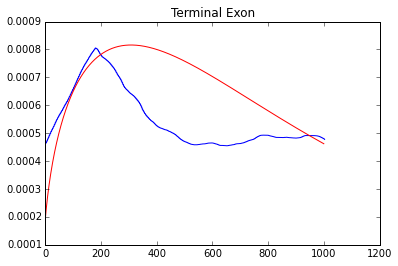

In [13]:
## get length distibution
table = pd.DataFrame(terminal_distr, columns=['position','probability'])
table.sort_index(axis = 0, ascending = False, by = ['probability'], inplace = True)

probabilityAccumulation = .90
table['accProb'] = table.probability.cumsum()
idx  = table.accProb < probabilityAccumulation

table_sub = table[idx].copy()
table_sub.sort_index(axis = 0, by = ['position'], inplace = True)

## generate sample length for gamma to fit
size = 100000
counts = map(lambda n: int(round(n)),table_sub.probability*size)
table_sub['counts'] = counts

lengths = sc.parallelize(table_sub[['position','counts']].values).flatMap(lambda (a,b):[a]*b).collect()

## fit gamma distribution
shape,loc,scale = stats.gamma.fit(lengths)
print "shape = {}, scale = {}".format(shape,scale)

n = 1000
plt.plot(table_sub.position[:n],table_sub.probability[:n], label = 'ES')
plt.plot(range(n),stats.gamma.pdf(range(n),shape,loc,scale), 'r',label = 'Gamma Fitting')
plt.title('Terminal Exon')
plt.show()

In [14]:
## visually checked, write to file
terminal_distr_approx = pd.DataFrame({'position':range(3,10001), 'probability':stats.gamma.pdf(range(3,10001),shape,loc,scale)})
terminal_distr_approx.probability = terminal_distr_approx.probability.apply(lambda x: "%.10f"%x)

outputFile = '{}terminal_exon_low.txt'.format(targetLow)
terminal_distr_approx.to_csv(outputFile, index = None, header = None, sep = '\t')

#### Step 4, intron length distribution

In [15]:
with open(sourceLow) as f:
    text = f.read()
    intron_distr = text.split('$INTRON_DISTR')[1].split('$INTERGENIC_DISTR')[0].rstrip().lstrip().split('\n')
    intron_distr = map(lambda x: x.split(), intron_distr)
    intron_distr = map(lambda x: (int(x[0]), float(x[1])), intron_distr)

shape = 2.1800550877, scale = 10.0563108803


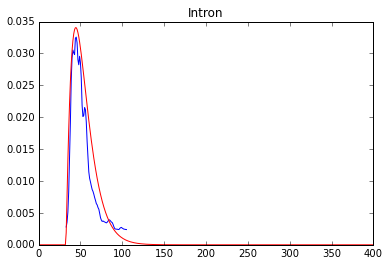

In [16]:
## get length distibution
table = pd.DataFrame(intron_distr, columns=['position','probability'])
table.sort_index(axis = 0, ascending = False, by = ['probability'], inplace = True)

probabilityAccumulation = .80
table['accProb'] = table.probability.cumsum()
idx  = table.accProb < probabilityAccumulation

table_sub = table[idx].copy()
table_sub.sort_index(axis = 0, by = ['position'], inplace = True)

## generate sample length for gamma to fit
size = 100000
counts = map(lambda n: int(round(n)),table_sub.probability*size)
table_sub['counts'] = counts

lengths = sc.parallelize(table_sub[['position','counts']].values).flatMap(lambda (a,b):[a]*b).collect()

## fit gamma distribution
shape,loc,scale = stats.gamma.fit(lengths)
print "shape = {}, scale = {}".format(shape,scale)

n = 400
plt.plot(table_sub.position[:n],table_sub.probability[:n], label = 'ES')
plt.plot(range(n),stats.gamma.pdf(range(n),shape,loc,scale), 'r',label = 'Gamma Fitting')
plt.title('Intron')
plt.show()

In [17]:
## visually checked, write to file
intron_distr_approx = pd.DataFrame({'position':range(20,3001), 'probability':stats.gamma.pdf(range(20,3001),shape,loc,scale)})
intron_distr_approx.probability = intron_distr_approx.probability.apply(lambda x: "%.10f"%x)

outputFile = '{}intron_low.txt'.format(targetLow)
intron_distr_approx.to_csv(outputFile, index = None, header = None, sep = '\t')

#### Step 5, spacer length distribution

In [18]:
with open(sourceLow) as f:
    text = f.read()
    spacer_distr = text.split('$BP_ACC_DISTR')[1].split('$DON_BP_MAX')[0].rstrip().lstrip().split('\n')
    spacer_distr = map(lambda x: x.split(), spacer_distr)
    spacer_distr = map(lambda x: (int(x[0]), float(x[1])), spacer_distr)

shape = 27.4493229927, scale = 0.513731909742


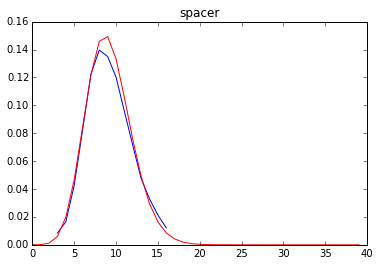

In [19]:
## get length distibution
table = pd.DataFrame(spacer_distr, columns=['position','probability'])
table.sort_index(axis = 0, ascending = False, by = ['probability'], inplace = True)

probabilityAccumulation = .95
table['accProb'] = table.probability.cumsum()
idx  = table.accProb < probabilityAccumulation

table_sub = table[idx].copy()
table_sub.sort_index(axis = 0, by = ['position'], inplace = True)

## generate sample length for gamma to fit
size = 100000
counts = map(lambda n: int(round(n)),table_sub.probability*size)
table_sub['counts'] = counts

lengths = sc.parallelize(table_sub[['position','counts']].values).flatMap(lambda (a,b):[a]*b).collect()

## fit gamma distribution
shape,loc,scale = stats.gamma.fit(lengths)
print "shape = {}, scale = {}".format(shape,scale)

n = 40
plt.plot(table_sub.position[:n],table_sub.probability[:n], label = 'ES')
plt.plot(range(n),stats.gamma.pdf(range(n),shape,loc,scale), 'r',label = 'Gamma Fitting')
plt.title('spacer')
plt.show()

In [20]:
## visually checked, write to file
spacer_distr_approx = pd.DataFrame({'position':range(2,41), 'probability':stats.gamma.pdf(range(2,41),shape,loc,scale)})
spacer_distr_approx.probability = spacer_distr_approx.probability.apply(lambda x: "%.10f"%x)

outputFile = '{}spacer_low.txt'.format(targetLow)
spacer_distr_approx.to_csv(outputFile, index = None, header = None, sep = '\t')

#### Step 6, donor to bp length distribution

In [21]:
with open(sourceLow) as f:
    text = f.read()
    donorToBp_distr = text.split('$DON_BP_DISTR')[1].rstrip().lstrip().split('\n')
    donorToBp_distr = map(lambda x: x.split(), donorToBp_distr)
    donorToBp_distr = map(lambda x: (int(x[0]), float(x[1])), donorToBp_distr)

shape = 6.77681368624, scale = 3.79848909742


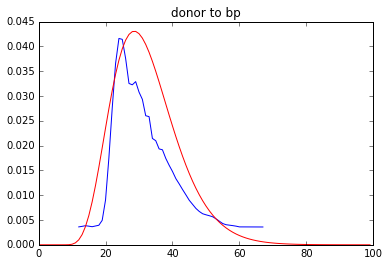

In [30]:
## get length distibution
table = pd.DataFrame(donorToBp_distr, columns=['position','probability'])
table.sort_index(axis = 0, ascending = False, by = ['probability'], inplace = True)

probabilityAccumulation = .72
table['accProb'] = table.probability.cumsum()
idx  = table.accProb < probabilityAccumulation

table_sub = table[idx].copy()
table_sub.sort_index(axis = 0, by = ['position'], inplace = True)

## generate sample length for gamma to fit
size = 100000
counts = map(lambda n: int(round(n)),table_sub.probability*size)
table_sub['counts'] = counts

lengths = sc.parallelize(table_sub[['position','counts']].values).flatMap(lambda (a,b):[a]*b).collect()

## fit gamma distribution
shape,loc,scale = stats.gamma.fit(lengths)
print "shape = {}, scale = {}".format(shape,scale)

n = 100
plt.plot(table_sub.position[:n],table_sub.probability[:n], label = 'ES')
plt.plot(range(n),stats.gamma.pdf(range(n),shape,loc,scale), 'r',label = 'Gamma Fitting')
plt.title('donor to bp')
plt.show()

In [31]:
## visually checked, write to file
donorToBp_distr_approx = pd.DataFrame({'position':range(2,41), 'probability':stats.gamma.pdf(range(2,41),shape,loc,scale)})
donorToBp_distr_approx.probability = donorToBp_distr_approx.probability.apply(lambda x: "%.10f"%x)

outputFile = '{}donorToBp_low.txt'.format(targetLow)
donorToBp_distr_approx.to_csv(outputFile, index = None, header = None, sep = '\t')